In [3]:
import numpy as np, matplotlib.pyplot as plt
from collections import OrderedDict as od
from scipy.special import comb as C
import json
acc_score = od()

In [4]:
def get_entropy_from_culling_factor(c):
    S = od()
    for E in range(-len(c), 1):
        if E in c:
            S[E] = np.log(c[E])
        for E1 in c:
            if (E1 > E):
                S[E] += np.log(1 - c[E1])
    return S

def get_entropy_from_culling_factor_with_heat(c):
    S = od()
    for E in range(-len(c) + 1, 1):
        if E in c:
            S[E + 2] = np.log(c[E])
        for E1 in c:
            if (E1 < E):
                S[E + 2] += np.log(1 - c[E1])
    return S

In [5]:
def read_files(parameters):
    q=parameters["q"];
    L=parameters["L"];
    R=parameters["R"];
    nSteps=parameters["nSteps"];
    seed=parameters["seed"];
    heat=parameters["heat"];
    N = L * L;
    name = "./datasets/2DHexPotts{}_q{}_N{}_R{}_nSteps{}_run{}X.txt".format("Heating" * heat, q, N, R, nSteps, seed)
    culling_factor = od()
    print(N, R, nSteps, heat)
    with open(name) as f:
        for line in f:
            E, c = map(float, line.split())
            culling_factor[E] = c

    parameters["culling_factor"] = culling_factor
    if not heat:
        parameters["S"] = get_entropy_from_culling_factor(culling_factor)
    else:
        parameters["S"] = get_entropy_from_culling_factor_with_heat(culling_factor)
    
    return parameters

In [3]:
d = [
    {
        "q": 4,
        "L": 6,
        "R" : 262144,
        "nSteps" : 50,
        "seed" : 0,
        "heat": False
    },
    {
        "q": 4,
        "L": 6,
        "R" : 16384,
        "nSteps" : 10,
        "seed" : 0,
        "heat": True
    },
    {
        "q": 4,
        "L": 8,
        "R" : 262144,
        "nSteps" : 50,
        "seed" : 0,
        "heat": False
    },
    {
        "q": 4,
        "L": 12,
        "R" : 262144,
        "nSteps" : 50,
        "seed" : 0,
        "heat": False
    },
    {
        "q": 4,
        "L": 16,
        "R" : 262144,
        "nSteps" : 50,
        "seed" : 0,
        "heat": False
    },
    {
        "q": 4,
        "L": 18,
        "R" : 262144,
        "nSteps" : 50,
        "seed" : 0,
        "heat": False
    },
    {
        "q": 4,
        "L": 24,
        "R" : 262144,
        "nSteps" : 50,
        "seed" : 0,
        "heat": False
    }
]
for i, parameters in enumerate(d):
    
    q=parameters["q"];
    L=parameters["L"];
    R=parameters["R"];
    nSteps=parameters["nSteps"];
    seed=parameters["seed"];
    heat=parameters["heat"];
    N=L*L;
    name = "./datasets/2DHexPotts{}_q{}_N{}_R{}_nSteps{}_run{}X.txt".format("Heating" * heat, q, N, R, nSteps, seed)
    culling_factor = od()
    print(N, R, nSteps, heat)
    with open(name) as f:
        for line in f:
            E, c = map(float, line.split())
            culling_factor[E] = c
    d[i]["culling_factor"] = culling_factor
    if not heat:
        d[i]["S"] = get_entropy_from_culling_factor(culling_factor)
    else:
        d[i]["S"] = get_entropy_from_culling_factor_with_heat(culling_factor)

36 262144 50 False
36 16384 10 True
64 262144 50 False
144 262144 50 False
256 262144 50 False
324 262144 50 False


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


576 262144 50 False


In [4]:
second_d = {parameters["L"]: parameters["S"] for parameters in d if not parameters["heat"]}
second_d_heat = {parameters["L"]: parameters["S"] for parameters in d if parameters["heat"]}

second_d.keys(), second_d_heat.keys()

(dict_keys([6, 8, 12, 16, 18, 24]), dict_keys([6]))

In [26]:
def analytical_levels(L, q=4):
    N = L * L

    return od({
        -3 * N / 2: np.log(q),
        -3 * N / 2 + 3: np.log(q * N),
        -3 * N / 2 + 4: np.log(q * N * 3),
        -3 * N / 2 + 5: np.log(q * N * 3 * 4),
        -3 * N / 2 + 6: np.log(q * N * 3 * 4 * 5 + q * N * (N - 3))
    })

In [27]:
analytical_shift = {}
for L in second_d:
    analytical_shift[L] = 0
    count = 0
    for E, S in analytical_levels(L).items():
        analytical_shift[L] += S - second_d[L][E]
        count += 1
    analytical_shift[L] /= count

In [28]:
analytical_shift

{6: 49.356655739630966,
 8: 88.12897282367626,
 12: 199.0203012260707,
 16: 354.2323062667785,
 18: 448.5346501326766,
 24: 797.8201184720605}

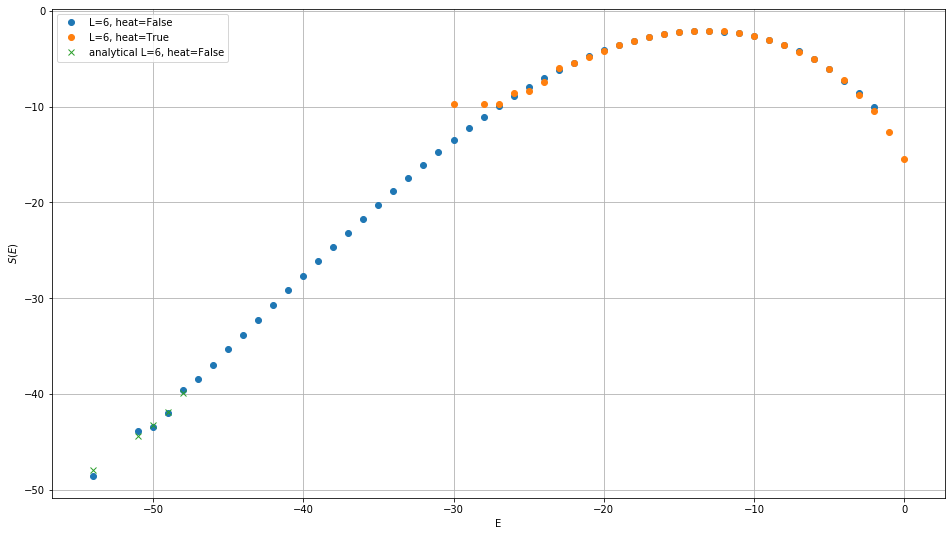

In [29]:
plt.figure(figsize=(16, 9))
lst = [6]
for L in lst:
    plt.plot([E for E in second_d[L]], [S for E, S in second_d[L].items()], 'o', label="L={}, heat={}".format(L, False))
    if L in second_d_heat:
        plt.plot([E for E in second_d_heat[L]], [S for E, S in second_d_heat[L].items()], 'o', label="L={}, heat={}".format(L, True))
    plt.plot([E for E in analytical_levels(L)], [S - analytical_shift[L] for E, S in analytical_levels(L).items()],
             'o', label="analytical L={}, heat={}".format(L, False), marker="x")

plt.ylabel("$S(E)$")
plt.xlabel("E")
plt.legend()
plt.grid()

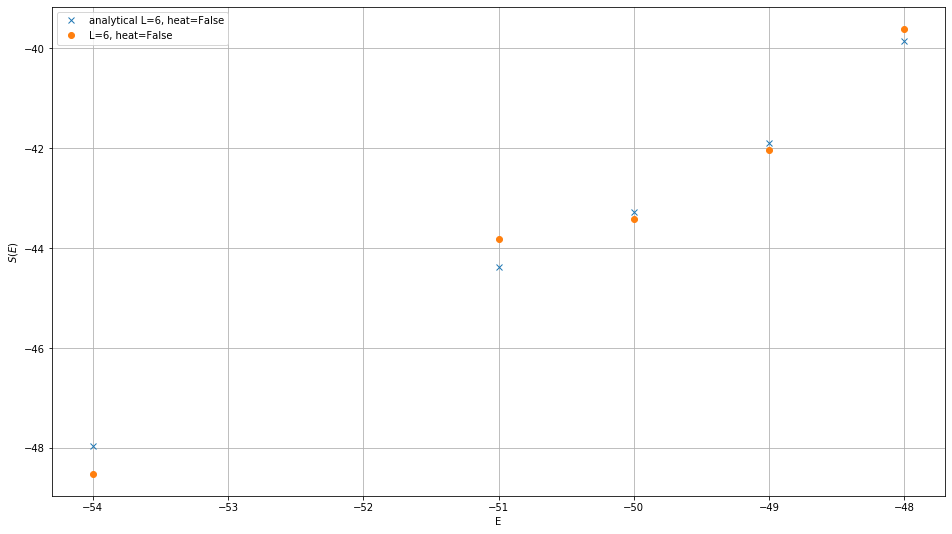

In [30]:
plt.figure(figsize=(16, 9))
for L in [6]:
    plt.plot([E for E in analytical_levels(L)], [S - analytical_shift[L] for E, S in analytical_levels(L).items()],
             'o', label="analytical L={}, heat={}".format(L, False), marker="x")
    plt.plot([E for E in analytical_levels(L)], [second_d[L][E] for E in analytical_levels(L)], 'o', label="L={}, heat={}".format(L, False))

plt.ylabel("$S(E)$")
plt.xlabel("E")
plt.legend()
plt.grid()

R movement